In [2]:
%pylab inline
import pyfits

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
datos = pyfits.open('hmi.m_45s.magnetogram.subregion_x1y1.fits')
cols = datos[0].data

#arreglo para el tiempo
tiempo=np.genfromtxt('times_delta.csv', delimiter=',')

In [4]:
#def modelo lineal
def modelo_lineal(t_obs,a,b):
    return a + b*t_obs
#funcion lineal_gauss
def lineal_gauss(t_obs, c, d, sigma, mu):
    n1 = sigma**2/(sqrt(2*pi))
    n2 = 0.5*((t_obs-mu)/sigma)**2
    return c +d*t_obs + n1*exp(-n2)
#funcion lineal_paso
def paso(t,f,g,h,n,t0):
    return f + g*t + h*(1 + 2/pi*arctan(n*(t-t0)))


In [5]:
x,y,like_Lineal,best_a,best_b = genfromtxt('Modelo_Lineal.csv', delimiter=',', skiprows=3,unpack=True)
x,y,like_Gauss,best_c,best_d,best_sigma, best_mu = genfromtxt('Modelo_Gauss.csv', delimiter=',', skiprows=3,unpack=True)
x,y,like_Paso,best_f,best_g,best_h,best_n,best_t0 = genfromtxt('Modelo_Paso.csv', delimiter=',', skiprows=3,unpack=True)


In [6]:
!ls

Bono					   images
convertir_tiempo.ipynb			   Mejores_modelos.txt
emcee_mcr.ipynb				   Modelo_Gauss.csv
Funcion_ajuste_linealGauss.ipynb	   Modelo_Lineal.csv
Funcion_ajuste_linealGauss.py		   Modelo_Paso.csv
Función_ajuste_lineal.ipynb		   Punto2_b.ipynb
Funcion_ajuste_lineal_paso.ipynb	   Punto2_b.py
Funcion_ajuste_lineal_paso.py		   sampler_flatchain.dat
Funcion_ajuste_lineal.py		   times.csv
Función_ajuste_lineal.py~		   times_delta.csv
hmi.m_45s.magnetogram.subregion_x1y1.fits


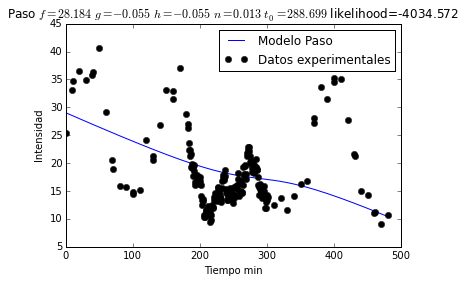

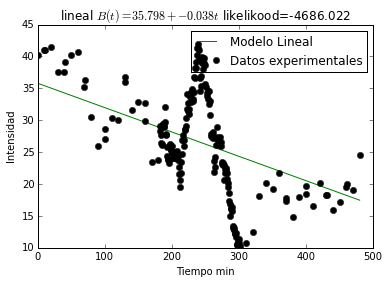

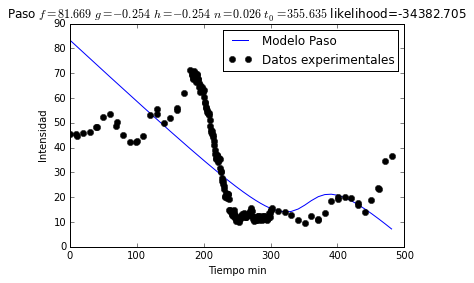

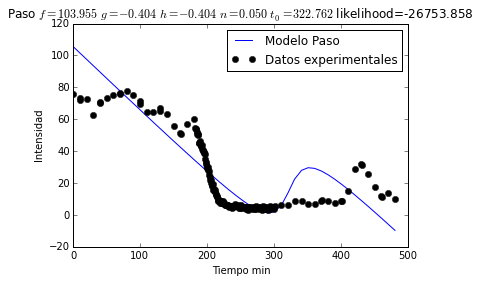

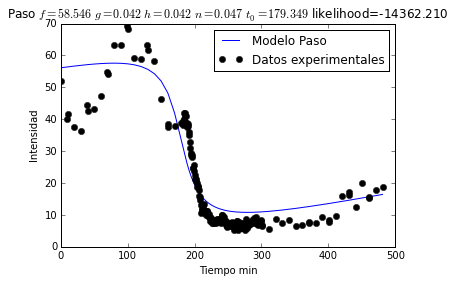

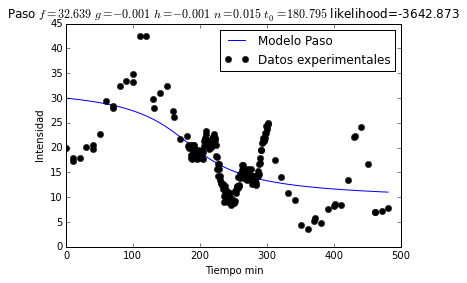

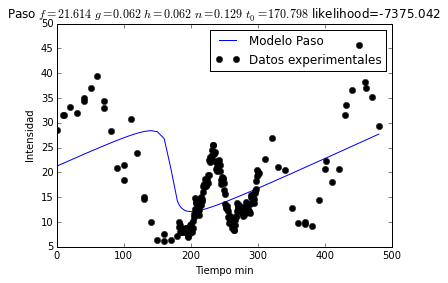

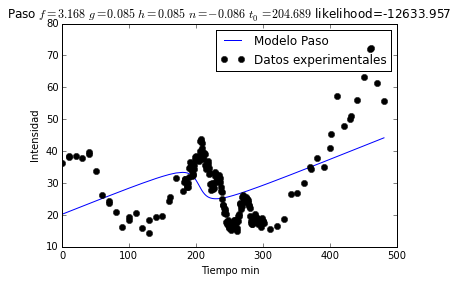

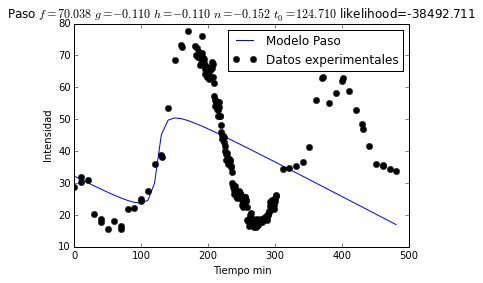

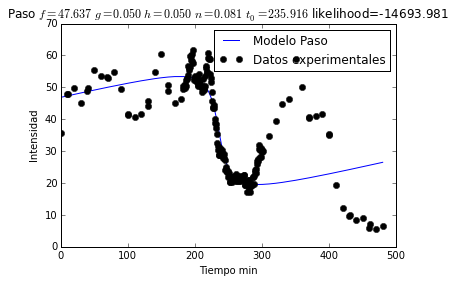

In [24]:
titulo = 'Los mejores modelos'
info = "x,y son las coordenas del pixel analizado en el archivo 'hmi.m_45s.magnetogram.subregion_x1y1.fits'"
info2 = "El mejor modelo se lista el nombre del modelo con mejor likelihood"
info3 = "La cantidad de parametros depende del modelo, en el caso lineal se obtienen 2 parametros, en el gaussiano 4 parametros y en el modelo 'paso' 5 parametros"
info4 = "Las x se usan para rellenar columnas"
heading = 'x,y,Mejor Modelo,Parametros' #modificar cada parametro
f = open('Mejores_modelos.txt','w')
f.write(titulo +'\n')
f.write(info + '\n')
f.write(info2 + '\n')
f.write(info3 + '\n')
f.write(heading +'\n')


n = len(x)
folder = './images/'
for i in range(n):
    campo = cols[:,x[i],y[i]]
    
    best_id = argmax([like_Lineal[i], like_Gauss[i], like_Paso[i]])
    
    if best_id==0:#escoge el like:lineal
        figure()
        plot(tiempo, modelo_lineal(tiempo,best_a[i],best_b[i]), 'g', label='Modelo Lineal')
        plot(tiempo,campo,'ko',label='Datos experimentales')
        xlabel('Tiempo min'); ylabel('Intensidad')
        title(r'lineal $B(t)=%.3f+%.3f t$ likelikood=%.3f'%(best_a[i],best_b[i],like_Lineal[i]))
        legend()
        savefig(folder + "mejor_lineal"+ str(x[i]) + str(y[i]) + ".png")
        f.write('%.7f,%.7f,Modelo_lineal,%.7f,%.7f,x,x,x\n'%(x[i],y[i],best_a[i],best_b[i]))
    elif best_id==1:#escoge el Gaussiano
        figure()
        plot(tiempo, lineal_gauss(tiempo,best_c[i],best_d[i], best_sigma[i], best_mu[i]), 'r', label='Modelo Gaussiano')
        plot(tiempo,campo,'ko',label='Datos experimentales')
        xlabel('Tiempo min'); ylabel('Intensidad')
        title(r'Gaussiano $c=%.3f$ $d=%.3f$ $\sigma=%.3f$ $\mu=%.3f$ likelihood=%.3f'%(best_c[i],best_d[i],best_sigma[i],best_mu[i],like_Gauss[i]))
        legend()
        savefig(folder + "mejor_linealGauss.png" + str(x[i]) + str(y[i]) + ".png")
        f.write('%.7f,%.7f,Modelo_Gauss,%.7f,%.7f,%.7f,%.7f,x\n'%(x[i],y[i],best_c[i],best_d[i], best_sigma[i], best_mu[i]))
        
    else: #escoge el Paso
        figure()
        plot(tiempo, paso(tiempo,best_f[i],best_g[i], best_h[i], best_n[i], best_t0[i]), 'b', label='Modelo Paso')
        plot(tiempo,campo,'ko',label='Datos experimentales')
        xlabel('Tiempo min'); ylabel('Intensidad')
        title(r'Paso $f=%.3f$ $g=%.3f$ $h=%.3f$ $n=%.3f$ $t_0=%.3f$ likelihood=%.3f'%(best_f[i],best_g[i],best_g[i],best_n[i],best_t0[i],like_Gauss[i]))
              #e^{-0.5*(\frac{t-%.3f}{%.3f})^2}$ likelikood=%.3f'%(best_c[i],best_d[i], best_sigma[i], best_mu[i], best_sigma[i],like_Gauss[i]))
        #title(r'$\frac{1}{2}$')
        legend()
        plt.savefig(folder + "mejor_linealPaso.png" + str(x[i]) + str(y[i]) + ".png")
        f.write('%.7f,%.7f,Modelo_Paso,%.7f,%.7f,%.7f,%.7f,%.7f\n'%(x[i],y[i],best_f[i],best_g[i], best_h[i], best_n[i], best_t0[i]))
f.close()     

In [14]:
!ls

Bono					   Mejores_modelos.txt
convertir_tiempo.ipynb			   mejor_linealPaso.png1.02.0.png
emcee_mcr.ipynb				   Modelo_Gauss.csv
Funcion_ajuste_linealGauss.ipynb	   Modelo_Lineal.csv
Funcion_ajuste_linealGauss.py		   Modelo_Paso.csv
Función_ajuste_lineal.ipynb		   Punto2_b.ipynb
Funcion_ajuste_lineal_paso.ipynb	   Punto2_b.py
Funcion_ajuste_lineal_paso.py		   sampler_flatchain.dat
Funcion_ajuste_lineal.py		   times.csv
Función_ajuste_lineal.py~		   times_delta.csv
hmi.m_45s.magnetogram.subregion_x1y1.fits
